In [2]:
import xarray as xr
import dask.array as da
import matplotlib.pyplot as plt
import numpy as np


In [3]:
yyyy='2020'

base_path='/work/hpc/datasets/un_fao/'

gunther_path=base_path+'input_verif_data/global/'+yyyy+'/'
kerrie_path=base_path+'pyaez/inputs/global/daily365_npy/'+yyyy+'/'

dates=['20200115','20200415','20200715','20201015']
idoys=[14,104,195,287] # no-leap julian day - 1 for zero indexing, corresponding to the dates

variables=['Tmax-2m','Precip']



# Plot Gunther minus Kerrie differences for daily data values

min/max difference: (-0.0050086975, 0.0050086975)


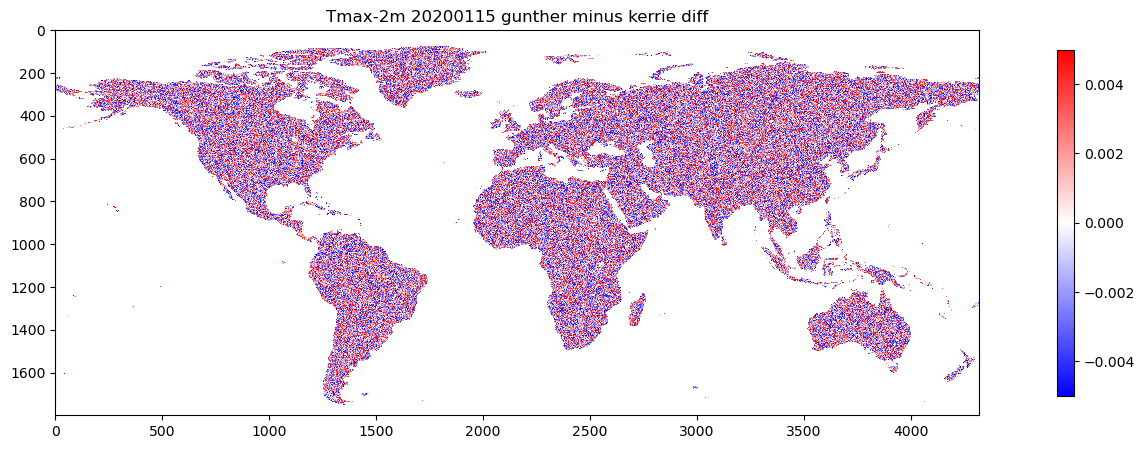

min/max difference: (-0.0050082207, 0.005010605)


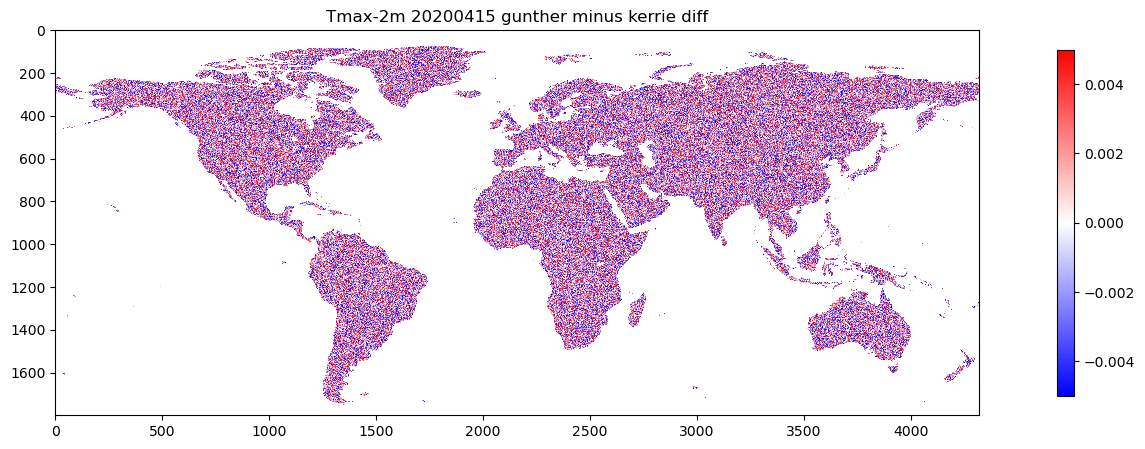

min/max difference: (-0.005012512, 0.0050086975)


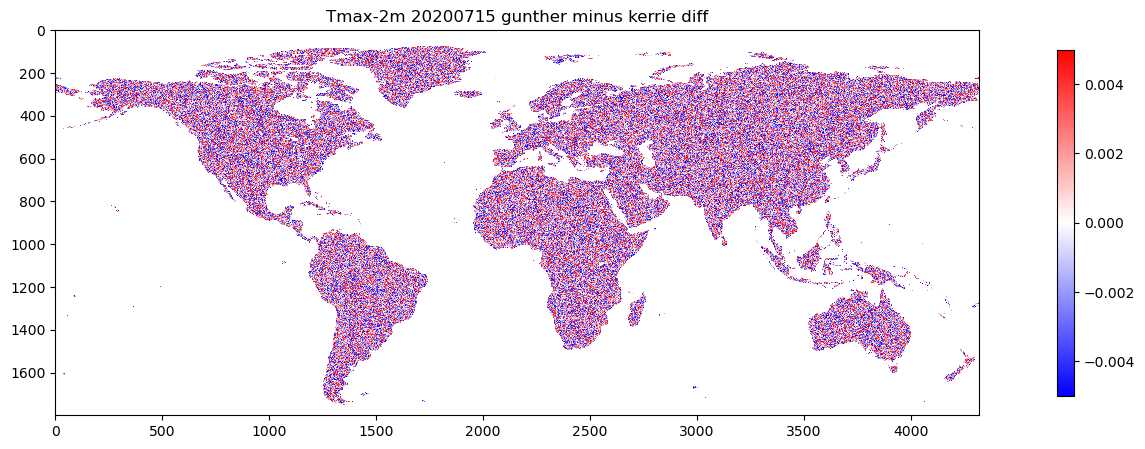

min/max difference: (-0.005010605, 0.0050086975)


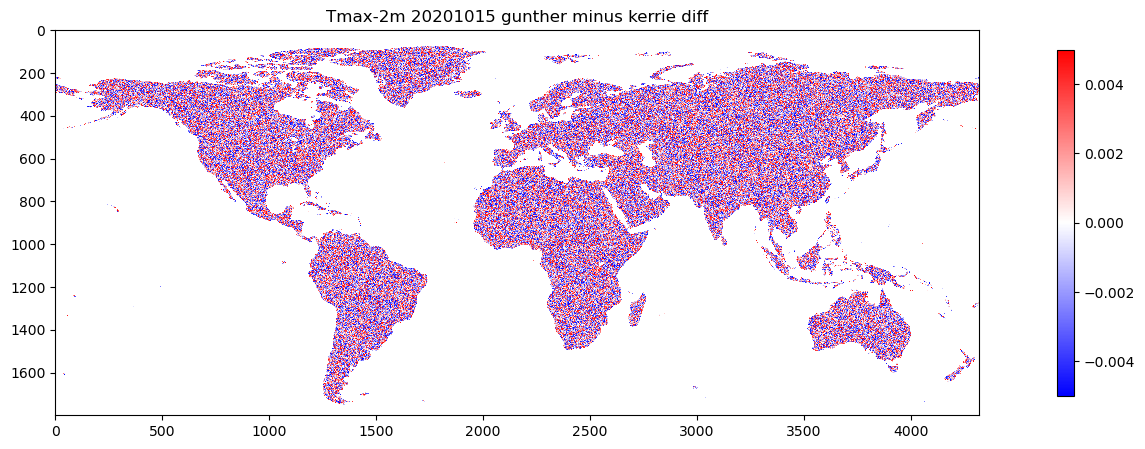

-----------------------------------------------------------------------------------------------------------------
min/max difference: (-0.07946777, 0.072265625)


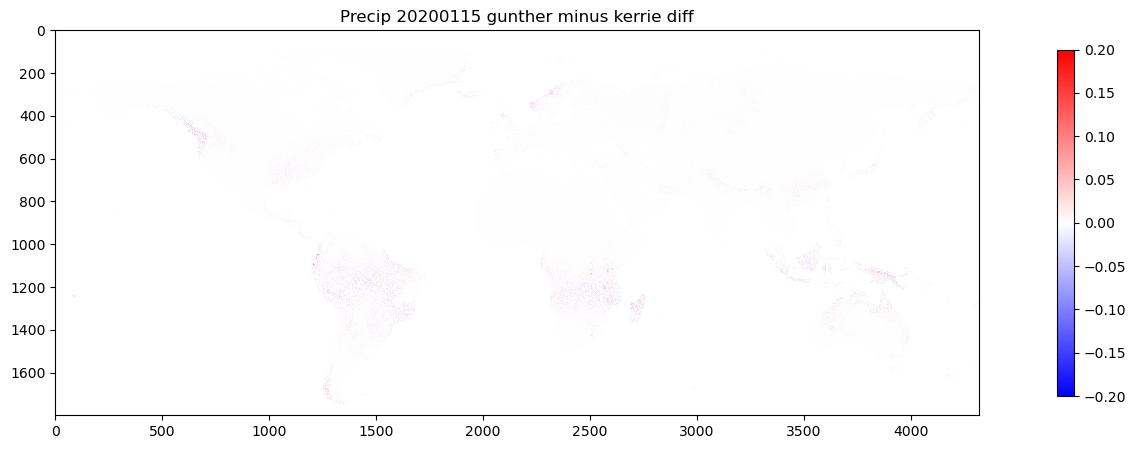

min/max difference: (-0.09471989, 0.09425354)


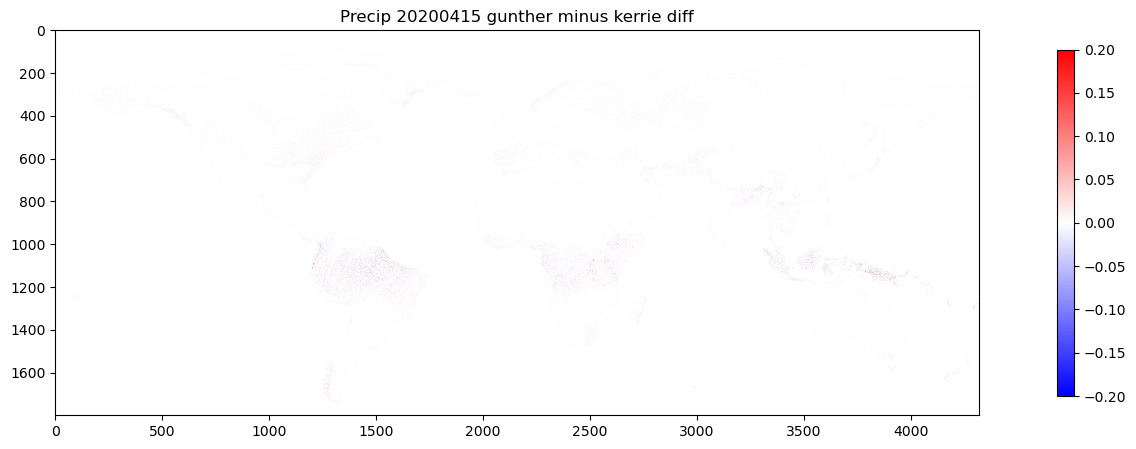

min/max difference: (-0.20385742, 0.21009827)


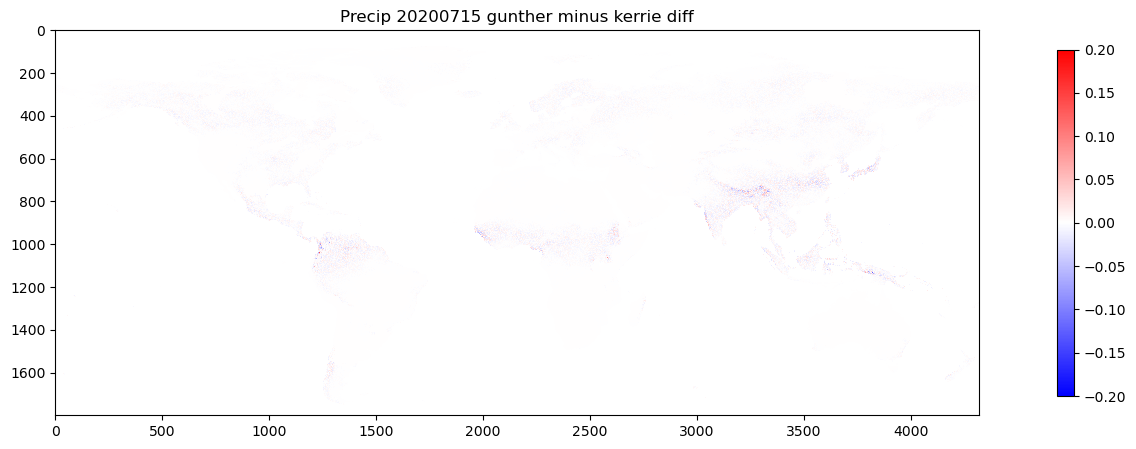

min/max difference: (-0.11676788, 0.17323112)


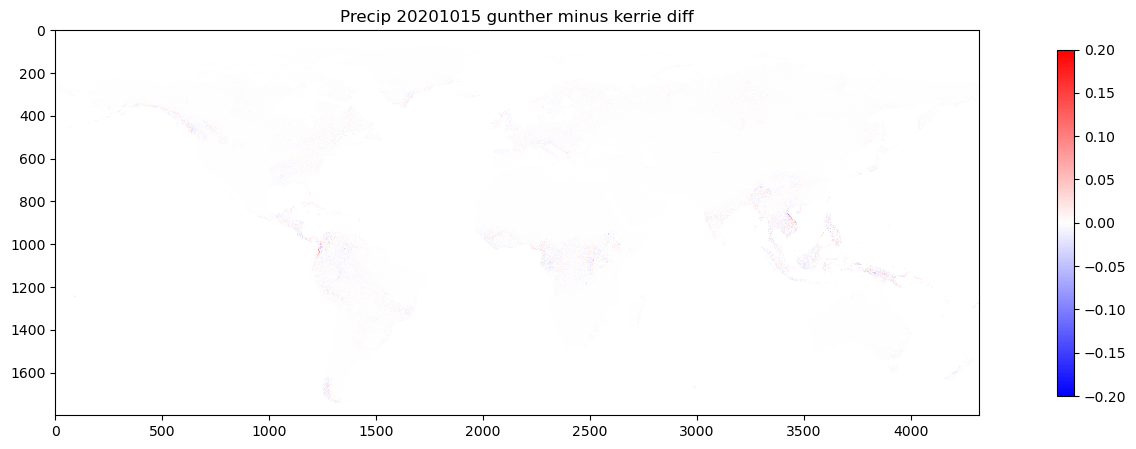

-----------------------------------------------------------------------------------------------------------------


In [3]:
for var in variables:
    # plotting settings
    if var=='Tmax-2m':
        vmin = -.005
        vmax = .005
        # decs=3
    if var=='Precip':
        vmin = -0.2
        vmax = 0.2
        # decs=5
    
    for idoy,date in zip(idoys,dates):
        # get gunther data
        gunther_file=gunther_path+var+'_AgERA5_Hist_'+date+'_5m.tif'
        gdata=xr.open_dataset(gunther_file,engine='rasterio').squeeze().isel(y=slice(0,1800))
        # gdata=np.trunc(gdata*10**decs)/10**decs

        # get kerrie data
        kerrie_file=kerrie_path+var+'/'
        kdata=da.from_npy_stack(kerrie_file)[:,:,idoy].compute()
        # kdata=np.trunc(kdata*10**decs)/10**decs
        
        # compute difference
        diff=(gdata.band_data.data-kdata)
        minmax=(np.nanmin(diff), np.nanmax(diff))
        print('min/max difference:',minmax)

        # plot
        figure=plt.figure(figsize=(20,5))
        plt.imshow(diff,interpolation='none',cmap='bwr',vmin=vmin,vmax=vmax)
        plt.colorbar(shrink=0.9)
        plt.title(var+' '+date+' gunther minus kerrie diff')
        plt.show()

        # clean up
        del gunther_file,gdata,kerrie_file,kdata,diff,minmax,figure
    print('-----------------------------------------------------------------------------------------------------------------')

# Plot kerrie Srad, Vapr, Wind negatives

all data minmax: (-0.005787037037037037, 452.54453703703706)
single date minmax: (-0.005786912706163195, 432.06814814814817)


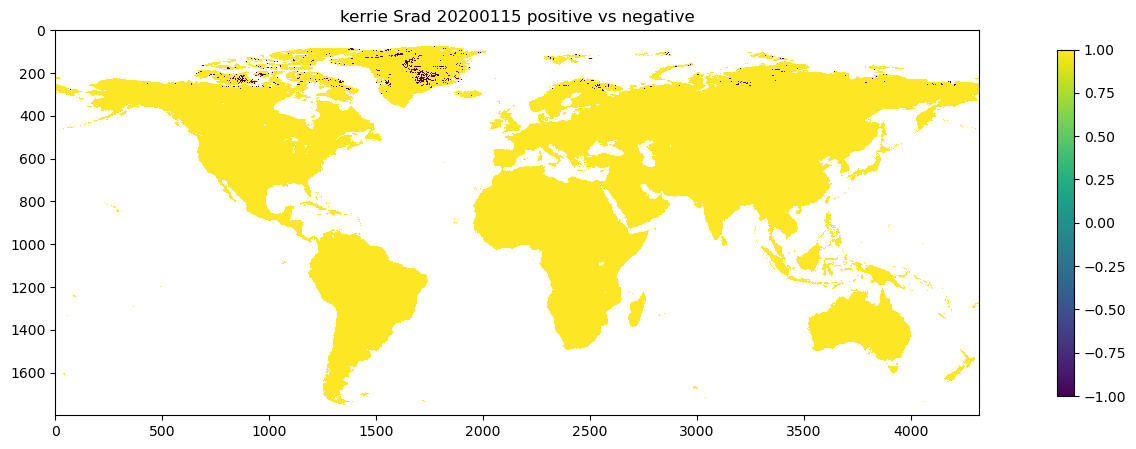

In [4]:
ind=0
figure=plt.figure(figsize=(20,5))
idoy=idoys[ind]

kerrie_file=kerrie_path+'Srad/'
kdata=da.from_npy_stack(kerrie_file).compute()
minmax=(np.nanmin(kdata),np.nanmax(kdata))
print('all data minmax:',minmax)
kdata=kdata[:,:,idoy]
minmax=(np.nanmin(kdata),np.nanmax(kdata))
print('single date minmax:',minmax)

kdata=np.where(kdata>=0,1,kdata)
kdata=np.where(kdata<0,-1,kdata)

plt.imshow(kdata,interpolation='none',vmin=-1,vmax=1)
plt.colorbar(shrink=0.9)
plt.title('kerrie Srad '+dates[ind]+' positive vs negative')    
plt.show()

### Srad has tiny negative values at high lats, limiting precision will eliminate negatives

single date min/max: (0.0, 432.06)


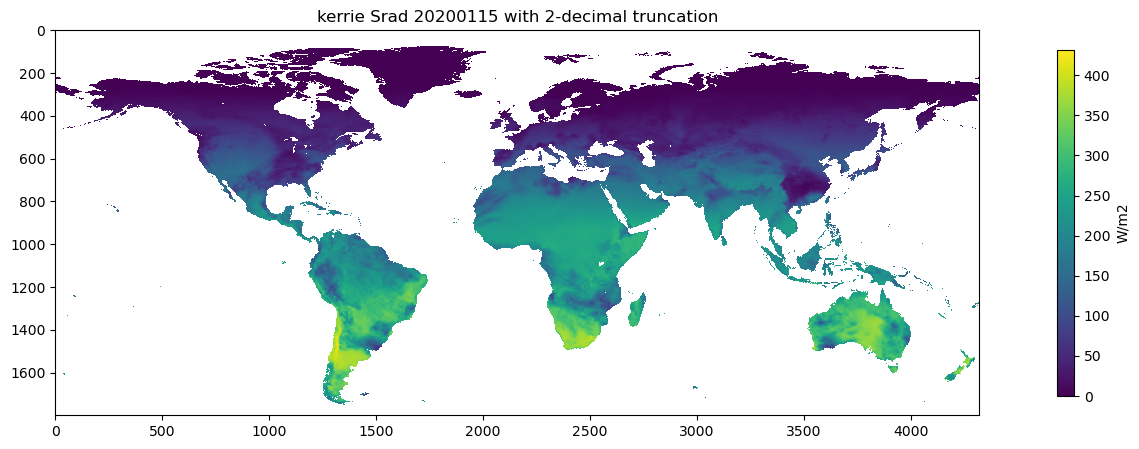

In [5]:
ind=0
figure=plt.figure(figsize=(20,5))
idoy=idoys[ind]

kerrie_file=kerrie_path+'Srad/'
kdata=da.from_npy_stack(kerrie_file)[:,:,idoy].compute()
kdata=np.trunc(kdata*10**2)/10**2
minmax=(np.nanmin(kdata),np.nanmax(kdata))
print('single date min/max:',minmax)

plt.imshow(kdata,interpolation='none')
plt.colorbar(shrink=0.9,label='W/m2')
plt.title('kerrie Srad '+dates[ind]+' with 2-decimal truncation')    
plt.show()

all data minmax: (-0.004999399, 46.55133)
single date minmax: (-0.004995823, 36.42235)


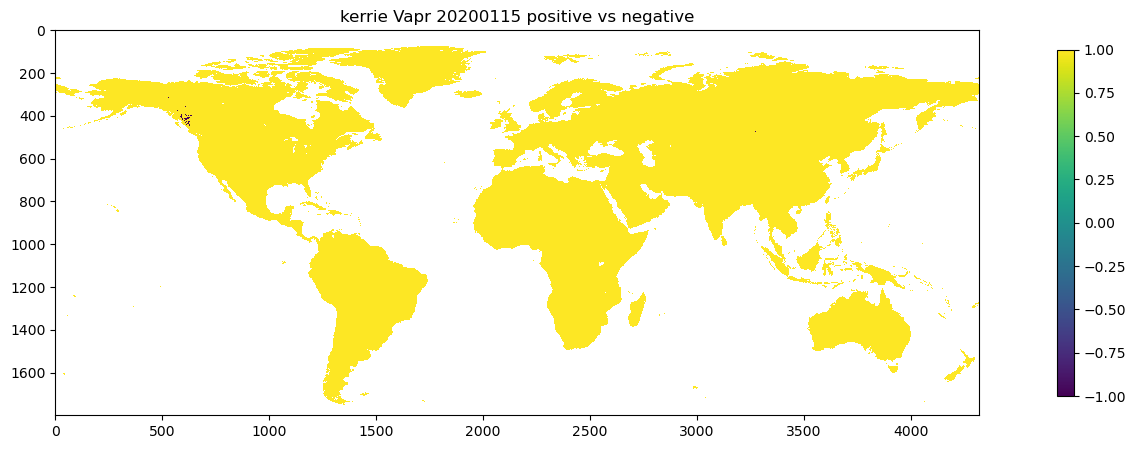

In [6]:
ind=0
figure=plt.figure(figsize=(20,5))
idoy=idoys[ind]

kerrie_file=kerrie_path+'Vapr/'
kdata=da.from_npy_stack(kerrie_file).compute()
minmax=(np.nanmin(kdata),np.nanmax(kdata))
print('all data minmax:',minmax)
kdata=kdata[:,:,idoy]
minmax=(np.nanmin(kdata),np.nanmax(kdata))
print('single date minmax:',minmax)

kdata=np.where(kdata>=0,1,kdata)
kdata=np.where(kdata<0,-1,kdata)

plt.imshow(kdata,interpolation='none',vmin=-1,vmax=1)
plt.colorbar(shrink=0.9)
plt.title('kerrie Vapr '+dates[ind]+' positive vs negative')    
plt.show()

### Vapr has tiny negative values at high lats, limiting precision will eliminate negatives

single date minmax: (0.0, 36.42)


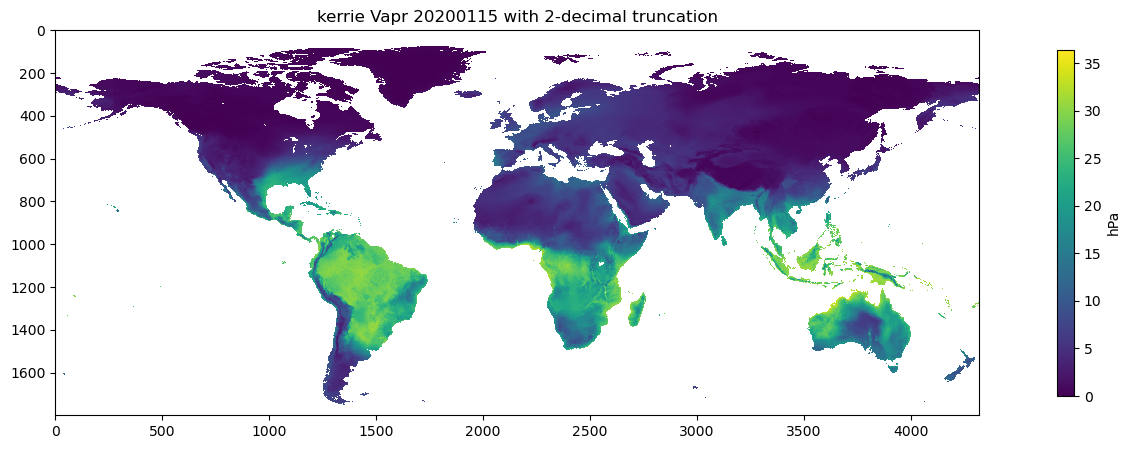

In [7]:
ind=0
figure=plt.figure(figsize=(20,5))
idoy=idoys[ind]

kerrie_file=kerrie_path+'Vapr/'
kdata=da.from_npy_stack(kerrie_file)[:,:,idoy].compute()
kdata=np.trunc(kdata*10**2)/10**2
minmax=(np.nanmin(kdata),np.nanmax(kdata))
print('single date minmax:',minmax)

plt.imshow(kdata,interpolation='none')
plt.colorbar(shrink=0.9,label='hPa')
plt.title('kerrie Vapr '+dates[ind]+' with 2-decimal truncation')    
plt.show()

all data minmax: (-0.00036984697, 26.457298)
single date minmax: (0.029527929, 15.395601)


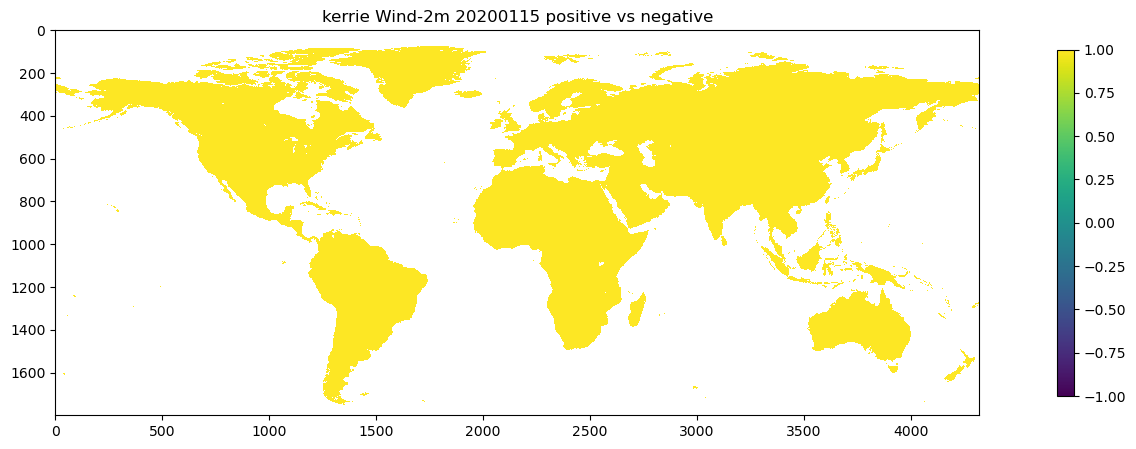

In [8]:
ind=0
figure=plt.figure(figsize=(20,5))
idoy=idoys[ind]

kerrie_file=kerrie_path+'Wind-2m/'
kdata=da.from_npy_stack(kerrie_file).compute()
minmax=(np.nanmin(kdata),np.nanmax(kdata))
print('all data minmax:',minmax)
kdata=kdata[:,:,idoy]
minmax=(np.nanmin(kdata),np.nanmax(kdata))
print('single date minmax:',minmax)

kdata=np.where(kdata>=0,1,kdata)
kdata=np.where(kdata<0,-1,kdata)

plt.imshow(kdata,interpolation='none',vmin=-1,vmax=1)
plt.colorbar(shrink=0.9)
plt.title('kerrie Wind-2m '+dates[ind]+' positive vs negative')    
plt.show()

### this date happens to not have any negatives but they do exist at other dates, limiting precision will eliminate negatives

single date minmax: (0.029, 15.395)


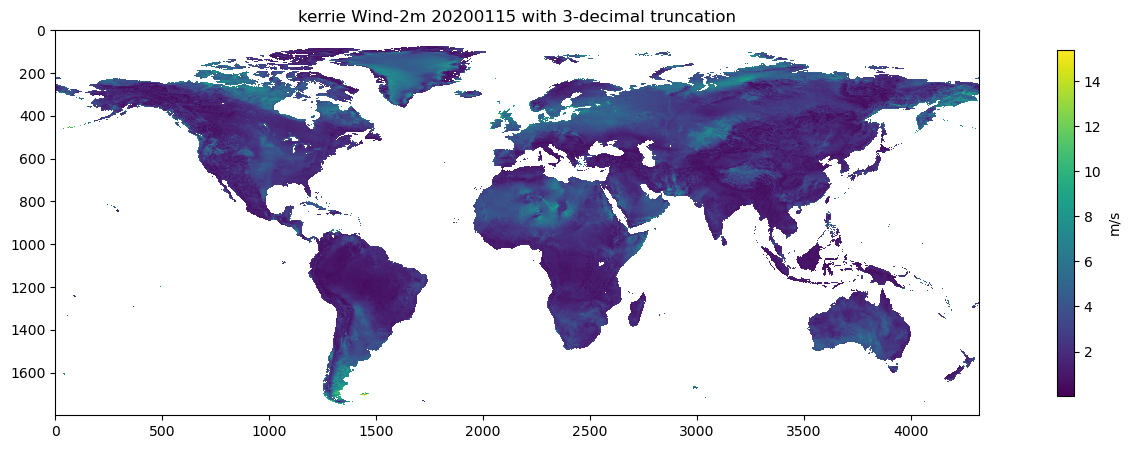

In [9]:
ind=0
figure=plt.figure(figsize=(20,5))
idoy=idoys[ind]

kerrie_file=kerrie_path+'Wind-2m/'
kdata=da.from_npy_stack(kerrie_file)[:,:,idoy].compute()
kdata=np.trunc(kdata*10**3)/10**3
minmax=(np.nanmin(kdata),np.nanmax(kdata))
print('single date minmax:',minmax)

plt.imshow(kdata,interpolation='none')
plt.colorbar(shrink=0.9,label='m/s')
plt.title('kerrie Wind-2m '+dates[ind]+' with 3-decimal truncation')    
plt.show()

# Relative Humidity

### there are some high latitude pixels where rhum >1

all data minmax: (-0.0, 2.4952)
single date minmax: (0.0, 2.4952)


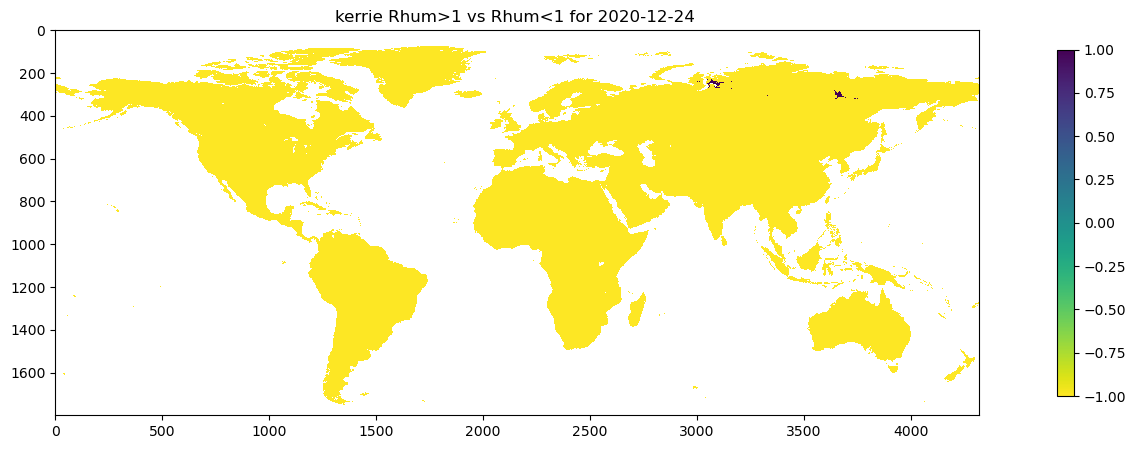

In [4]:
figure=plt.figure(figsize=(20,5))
idoy=357

kerrie_file=kerrie_path+'Rhum/'
kdata=da.from_npy_stack(kerrie_file).compute()
minmax=(np.nanmin(kdata),np.nanmax(kdata))
print('all data minmax:',minmax)
kdata=kdata[:,:,idoy]
minmax=(np.nanmin(kdata),np.nanmax(kdata))
print('single date minmax:',minmax)

kdata=np.where(kdata<=1,-1,kdata)
kdata=np.where(kdata>1,1,kdata)

plt.imshow(kdata,interpolation='none',vmin=-1,vmax=1,cmap='viridis_r')
plt.colorbar(shrink=0.9)
plt.title('kerrie Rhum>1 vs Rhum<1 for 2020-12-24 ')    
plt.show()

 ### Next, let's see all pixels that are affected for at least one day of the year

processing iday 0
processing iday 100
processing iday 200
processing iday 300


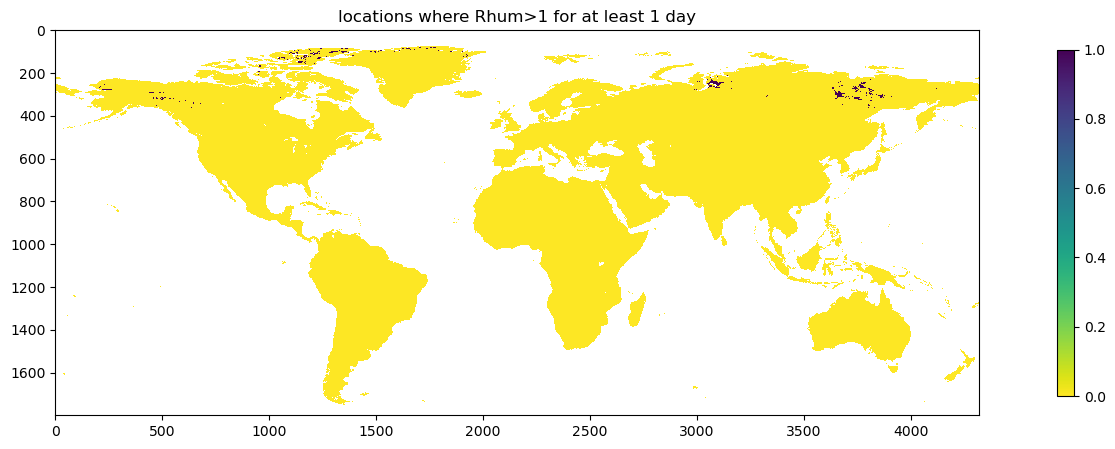

In [5]:
kerrie_file=kerrie_path+'Rhum/'
kdata=da.from_npy_stack(kerrie_file).compute()

badmask=kdata[:,:,0]
badmask=np.where(np.isfinite(badmask),0,badmask)
for d in range(kdata.shape[2]):
    if d%100==0: print('processing iday', d)
    badmask=np.where(kdata[:,:,d]>1,1,badmask)

figure=plt.figure(figsize=(20,5))
plt.imshow(badmask,interpolation='none',vmin=0,vmax=1,cmap='viridis_r')
plt.colorbar(shrink=0.9)
plt.title('locations where Rhum>1 for at least 1 day')
plt.show()

In [6]:
np.nansum(badmask)

8929.0

#### There are ^ pixels affected. The issue is only at high lats. Next, let's look at the min/max values 

/tmp/ipykernel_304388/269852827.py:1: RuntimeWarning: All-NaN slice encountered
  mins=np.nanmin(kdata,axis=2)
/tmp/ipykernel_304388/269852827.py:2: RuntimeWarning: All-NaN slice encountered
  maxs=np.nanmax(kdata,axis=2)


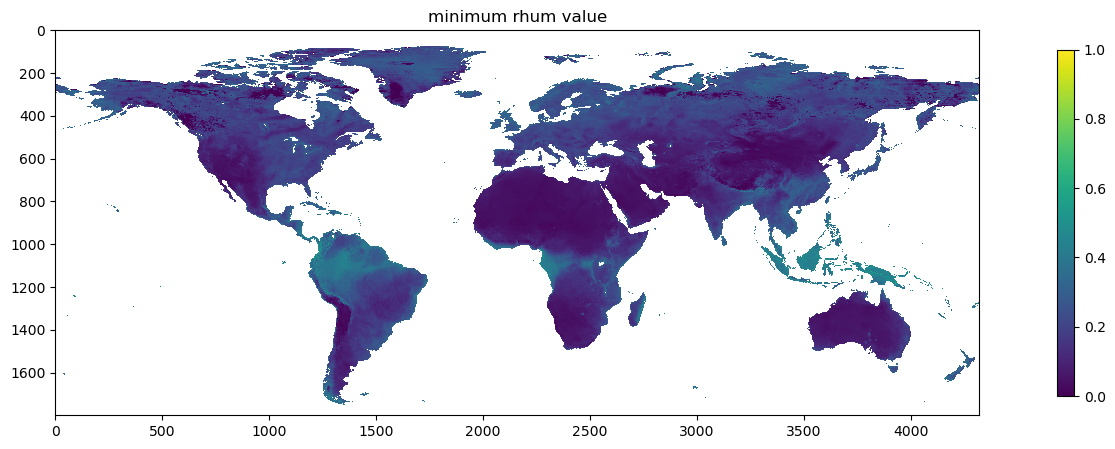

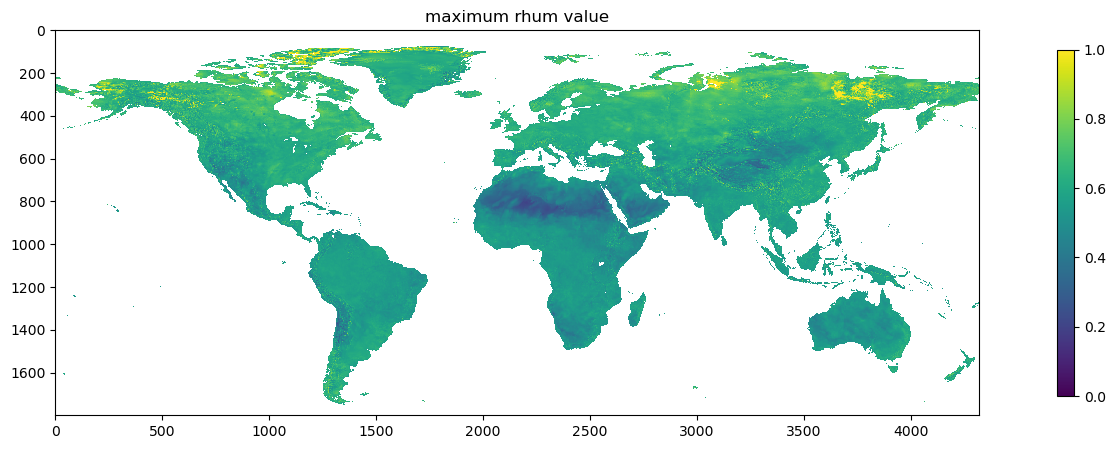

In [7]:
mins=np.nanmin(kdata,axis=2)
maxs=np.nanmax(kdata,axis=2)

figure=plt.figure(figsize=(20,5))
plt.imshow(mins,interpolation='none',vmin=0,vmax=1)
plt.colorbar(shrink=0.9)
plt.title('minimum rhum value')
plt.show()

figure=plt.figure(figsize=(20,5))
plt.imshow(maxs,interpolation='none',vmin=0,vmax=1)
plt.colorbar(shrink=0.9)
plt.title('maximum rhum value')
plt.show()

### These look ok.  How to fix rhum>1, just set equal to 1?